In [ ]:
底部（买入）跨式组合（bottom straddle），也称之为多头对敲策略。
由相同K、相同期限的看涨期权多头和看跌期权多头组成，当投资者认为标的资产价格
会有大幅变化（看多波动率）但是方向不确定时适用该策略。

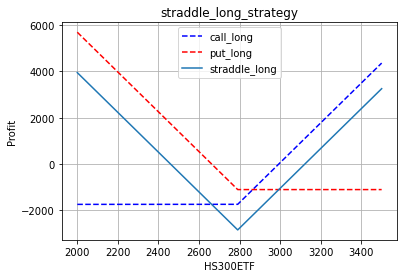

In [8]:
#多头对敲策略
import numpy as np
import matplotlib.pyplot as plt
def straddle_long(K,C,P,P0,P0_index,Pt_index,N_call,N_put,N_underlying):
    '''K:期权执行价格；
    C:看涨期权的当前价格；
    P:看跌期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N_call:看涨期权头寸数量；
    N_put:看跌期权头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''
    Pt = P0*Pt_index/P0_index
    call_long=N_call*N_underlying*(np.maximum(Pt-K,0)-C)
    put_long = N_put*N_underlying*(np.maximum(K-Pt,0)-P)
    straddle_long = call_long+put_long
    return Pt_index,call_long,put_long,straddle_long

A=straddle_long(K=2.4,C=0.1745,P=0.1106,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_call=1,N_put=1,N_underlying=10000)   

plt.title('straddle_long_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(A[0],A[1],'b--',label='call_long')
plt.plot(A[0],A[2],'r--',label='put_long')
plt.plot(A[0],A[3],'-',label='straddle_long')
plt.legend()
plt.grid()




    

In [ ]:
顶部（卖出）跨式组合（top straddle），也称之为空头对敲策略。
由相同K、相同期限的看涨期权空头和看跌期权空头组成，当投资者认为标的资产
价格变化不大时适用该策略，与底部跨式组合的收益相反。

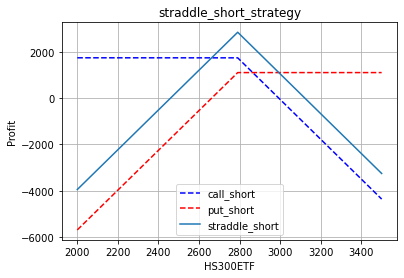

In [7]:
#空头对敲策略
def straddle_short(K,C,P,P0,P0_index,Pt_index,N_call,N_put,N_underlying):
    '''K:期权执行价格；
    C:看涨期权的当前价格；
    P:看跌期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N_call:看涨期权头寸数量；
    N_put:看跌期权头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''    
    Pt=P0*Pt_index/P0_index
    call_short=N_call*N_underlying*(C-np.maximum(Pt-K,0))
    put_short=N_put*N_underlying*(P-np.maximum(K-Pt,0))
    straddle_put=call_short+put_short
    return Pt_index,call_short,put_short,straddle_put

B=straddle_short(K=2.4,C=0.1745,P=0.1106,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_call=1,N_put=1,N_underlying=10000)  

plt.title('straddle_short_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(B[0],B[1],'b--',label='call_short')
plt.plot(B[0],B[2],'r--',label='put_short')
plt.plot(B[0],B[3],'-',label='straddle_short')
plt.legend()
plt.grid()
    


In [ ]:
二、条式组合与带式组合
1.序列组合（strip）策略是指由相同K、相同期限的一个看涨期权多头头寸与两个
看跌期权多头头寸所构建。如果投资者认为基础资产价格会有大的变动，且基础资产
价格下跌的可能性要大于上涨的可能性，就可以选择序列组合策略。

2.带式组合（strap）策略是由相同K、相同期限的两个欧式看涨期权多头头寸和一个
欧式看跌期权多头头寸所构造。如果投资者也是预测基础资产价格会有大的变动，且基
础资产价格上涨的可能性要大于下跌的可能性，带式组合策略就是一种比较好的选择。

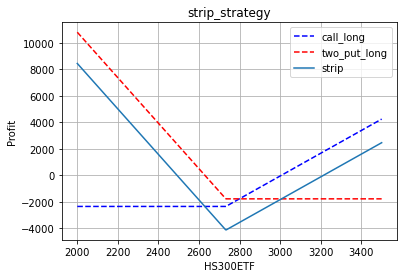

In [9]:
#序列组合策略
def strip(K,C,P,P0,P0_index,Pt_index,N_callstrip,N_putstrip,N_underlying):
    '''K:期权执行价格；
    C:看涨期权的当前价格；
    P:看跌期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N_callstrip:看涨期权头寸数量；
    N_putstrip:看跌期权头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''    
    Pt=P0*Pt_index/P0_index 
    call_long = N_callstrip*N_underlying*(np.maximum(Pt-K,0)-C)
    put_long =N_putstrip*N_underlying*(np.maximum(K-Pt,0)-P)
    strip=call_long+put_long
    return Pt_index,call_long,put_long,strip

C=strip(K=2.35,C=0.2360,P=0.0893,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_callstrip=1,N_putstrip=2,N_underlying=10000) 

plt.title('strip_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(C[0],C[1],'b--',label='call_long')
plt.plot(C[0],C[2],'r--',label='two_put_long')
plt.plot(C[0],C[3],'-',label='strip')
plt.legend()
plt.grid()

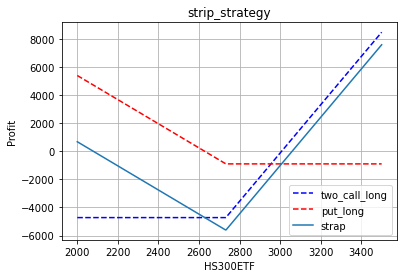

In [11]:
#带式组合策略
def strap(K,C,P,P0,P0_index,Pt_index,N_callstrap,N_putstrap,N_underlying):
    '''K:期权执行价格；
    C:看涨期权的当前价格；
    P:看跌期权的当前价格；
    P0:标的资产当前单位净值价格；
    P0_index：标的资产当前收盘点位；
    Pt_index：期权到期日标的资产收盘点位；
    N_callstrap:看涨期权头寸数量；
    N_putstrap:看跌期权头寸数量；
    N_underlying：1张标的资产期权基础资产是多少份单位净值.'''    
    Pt=P0*Pt_index/P0_index
    call_long = N_callstrap*N_underlying*(np.maximum(Pt-K,0)-C)
    put_long =N_putstrap*N_underlying*(np.maximum(K-Pt,0)-P)
    strap=call_long+put_long
    return Pt_index,call_long,put_long,strap

D=strap(K=2.35,C=0.2360,P=0.0893,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_callstrap=2,N_putstrap=1,N_underlying=10000)   

plt.title('strip_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(D[0],D[1],'b--',label='two_call_long')
plt.plot(D[0],D[2],'r--',label='put_long')
plt.plot(D[0],D[3],'-',label='strap')
plt.legend()
plt.grid()
    

In [ ]:
宽跨式组合(strangle)
1.买入宽跨式策略，也称为底部垂直组合策略(bottom vertical combination)。
底部（买入）宽跨式组合（strange）由相同期限的看涨期权多头和看跌期权多头
组成，且K1(看涨期权)>K2(看跌期权)，当投资者认为标的资产价格会有非常大的
变动（看多波动率）但是方向不确定时适用该策略，宽跨式策略盈利空间不如跨式策
略大，但其成本更低。

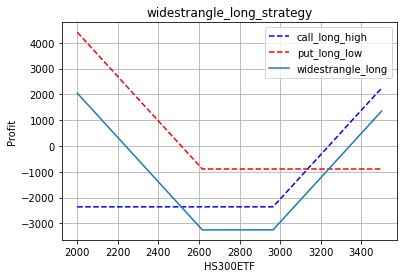

In [13]:
#买入宽跨式策略
def widestrangle_long(K1,K2,C,P,P0,P0_index,Pt_index,N_call,N_put,N_underlying):
    Pt = P0*Pt_index/P0_index
    call_long_high=N_call*N_underlying*(np.maximum(Pt-K1,0)-C)
    put_long_low=N_put*N_underlying*(np.maximum(K2-Pt,0)-P)
    widestrangle_long=call_long_high+put_long_low
    return Pt_index,call_long_high,put_long_low,widestrangle_long

#忘了打函数...
#E=(K1=2.55,K2=2.25,C=0.2360,P=0.0893,P0=2.352,P0_index=2734.52,Pt_index=np.linspace(2000,3500,500),N_call=1,N_put=1,N_underlying=10000)
E=widestrangle_long(K1=2.55,K2=2.25,C=0.2360,P=0.0893,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_call=1,N_put=1,N_underlying=10000) 

plt.title('widestrangle_long_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(E[0],E[1],'b--',label='call_long_high')
plt.plot(E[0],E[2],'r--',label='put_long_low')
plt.plot(E[0],E[3],'-',label='widestrangle_long')
plt.legend()
plt.grid()

In [ ]:
2.卖出宽跨式策略，也称为顶部垂直组合(top vertical combination)。
投资者持有相同合约期限、不同执行价格的欧式看跌期权与看涨期权空头，具体是一
个较低执行价格K1的看跌期权空头和一个较高执行价格K2的看涨期权空头，次策略
的收益与买入宽跨式组合策略完全相反。如果投资者认为未来基础资产的价格比较
平稳，不会出现较大的波动（看空波动率），则可以采用该交易策略。

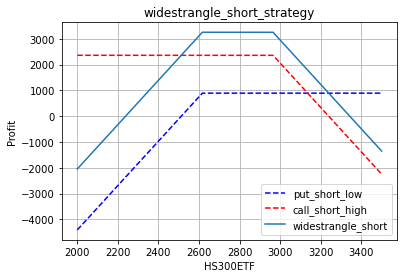

In [16]:
#卖出宽跨式策略
def widestrangle_short(K1,K2,C,P,P0,P0_index,Pt_index,N_call,N_put,N_underlying):
    Pt = P0*Pt_index/P0_index
    put_short_low=N_put*N_underlying*(P-np.maximum(K1-Pt,0))
    call_short_high=N_call*N_underlying*(C-np.maximum(Pt-K2,0))
    widestrangle_short=put_short_low+call_short_high
    return Pt_index,put_short_low,call_short_high,widestrangle_short

F=widestrangle_short(K1=2.25,K2=2.55,C=0.2360,P=0.0893,P0=2.352,P0_index=2734.52,
                Pt_index=np.linspace(2000,3500,500),N_call=1,N_put=1,N_underlying=10000)   

plt.title('widestrangle_short_strategy')
plt.xlabel('HS300ETF')
plt.ylabel('Profit')
plt.plot(F[0],F[1],'b--',label='put_short_low')
plt.plot(F[0],F[2],'r--',label='call_short_high')
plt.plot(F[0],F[3],'-',label='widestrangle_short')
plt.legend()
plt.grid()